imports

In [162]:
import rasterio as rastr
import numpy as np
import jupyter
from matplotlib import pyplot

open GeoTIFF image

In [163]:
image = rastr.open("../images/soil_moisture.tif") # open image
# with rastr.open("../images/soil_moisture.tif") as src:
#     image = src.read(1)
#     image = image.astype(np.float32)

get BBOX (Bounding Box) and CRS (Сoordinates System)

In [164]:
bbox = image.bounds # get bounding box
crs = image.crs # get CRS (coordinate system)

print(f"{bbox}\nCRS: {crs}")

BoundingBox(left=29.566633136000007, bottom=49.434589403000004, right=31.185382877000006, top=50.486672568)
CRS: EPSG:4326


2-dimensional GeoTIFF from the image's 1st layer

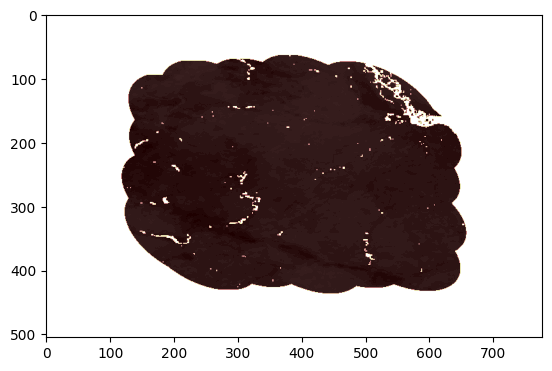

In [165]:
array = image.read(1) # get 1st layer of the image
array.shape # get coordinates (x;z)  of the image
pyplot.imshow(array, cmap='pink') # outputs 2D numpy ndarray

read image's layer (3-dimensional coordinates)

In [166]:
array = image.read() # read image as 3-dimensional (3D)
array.shape # get its' coordinates

(1, 505, 777)

I guess that I get some 3-dimensional data of the image.

In [167]:
for i, dtype, nodataval in zip(image.indexes, image.dtypes, image.nodatavals): # output smth misunderstandable
    print(i, dtype, nodataval)

1 uint16 None


In [168]:
nodata = image.nodata # this attr in rasterio allows us to get the nodata balue that is assigned to those pixels marked as nodata in the dataset
image = array.astype(np.float32) # convert our image into another type. 'Cause uint16/18 type cannot be masked somehow
mask = ~np.isnan(image) # mask our image. Make all nodata value equal to 0. Which makes your calculation much easier. All valid pixels are set to 1.

valid_values = image[mask] # gets an array of only valid values(pixels) of the image
invalid_values = image[~mask] # gets an array of only invalid values(pixels) of the image
valid_count = np.count_nonzero(mask) # gets the number of valid values(non-zero) in an array
invalid_count = mask.size - valid_count # gets a count of invalid values.
    # mask.size - total number of pixels in the image
    # valid_count - number of valid pixels in the image

print(f"Valid count: {valid_count}") # {len(valid_values)} - the same shit
print(f"Invalid count: {invalid_count}") # {len(invalid_values)} - the same shit

Valid count: 392385, 392385
Invalid count: 0, 0


close image reading

In [51]:
image.close()